# Data Exploration

In this Notebook we will explore the data to gain insights. We will also seek to answer the questions raised by our stakeholders using the data.

In [33]:
# Import libraries
import pandas as pd
import numpy as np

import pickle 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

#Import Warnings
import warnings
warnings.filterwarnings("ignore")

## Load Data

We will first load the `gamesdata.csv` file, which has a row for each game and various descriptive features as columns.

In [34]:
# Load games data
gamesdata = pd.read_csv('gamesdata.csv', index_col = 0)
gamesdata.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
3,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",NaN,http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd,Mixed,NaN


We also load the `mergeddata.csv` file which has a row for each user-item interaction.

In [35]:
# Load merged data
mergeddata = pd.read_csv('mergeddata.csv', index_col = 0)
mergeddata.head()

,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,0,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
1,1,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
2,3,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
3,4,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
4,10,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0


And finally we load the `numgames.csv` file which just lists the number of games owned for each user.

In [36]:
# Load numgames data
numgames = pd.read_csv('numgames.csv', index_col = 0)
numgames.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


## Exploration

### User interaction data

In [37]:
mergeddata['id'].nunique()

4485

In [38]:
mergeddata['uid'].nunique()

863

### Release date

In [39]:
# Select entries where release date is not null
data = gamesdata[gamesdata['release_date'].notnull()]

In [40]:
# Describe feature
data['release_date'].describe()

count          30067
unique          3582
top       2012-10-16
freq             100
Name: release_date, dtype: object

We note that there are 3582 unique values. We want to convert the type to Datetime instead of object.

In [41]:
# Replace strings which are not of the format xxxx-xx-xx with None
data['release_date'] = data['release_date'].map(lambda x : x if x[-3] == '-'else None)

# Select entries where release date is not null
data = data[data['release_date'].notnull()]

# Convert to DateTime 
data['release_date'] = pd.to_datetime(data['release_date'])

# Check 
data['release_date'].describe()

count                   29782
unique                   3457
top       2012-10-16 00:00:00
freq                      100
first     1970-07-15 00:00:00
last      2021-12-31 00:00:00
Name: release_date, dtype: object

We see that our data contains games ranging from 1970 up to predicted release date of December 2021.

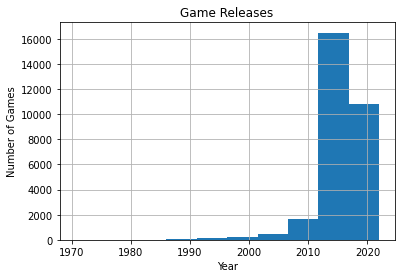

In [42]:
# Plot histogram of release date feat
data['release_date'].hist()
plt.title('Game Releases')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

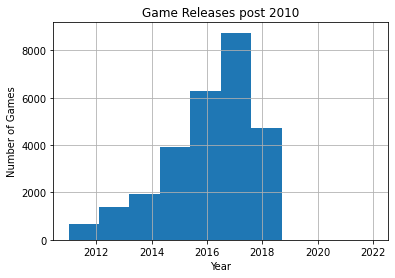

In [43]:
# Focus on post 2010
recentgames = data[data['release_date'].dt.year > 2010]

recentgames['release_date'].hist()
plt.title('Game Releases post 2010')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

Let's see which months are most popular for new releases.

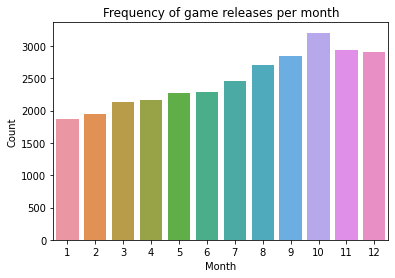

In [44]:
# Create month feature
data['release_month'] = data['release_date'].dt.month

# Plot countplot using Seaborn
sns.countplot(x = data['release_month'], data = data)
plt.title('Frequency of game releases per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

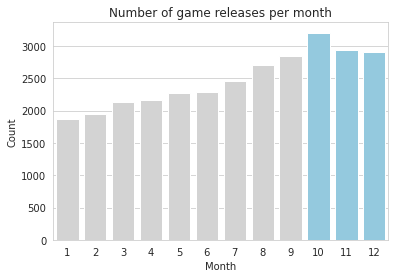

In [45]:
# Countplot of sale month

# define palette to highlight best months to buy house
custompalette = {release_month: "skyblue" if (release_month == 10 or release_month == 11 or release_month == 12 ) else "lightgrey" \
                 for release_month in data['release_month'].unique()}

with sns.axes_style("whitegrid"):
    sns.countplot(x = data['release_month'], palette = custompalette, data = data)
plt.title('Number of game releases per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('Images/month.pdf', bbox_inches = "tight")

We see that October, November and December have the highest number of game releases. Let's look at quarters now.

In [46]:
# Define function to determine quarter
def quarter(month):
    ''' Returns quarter in which month falls'''
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter

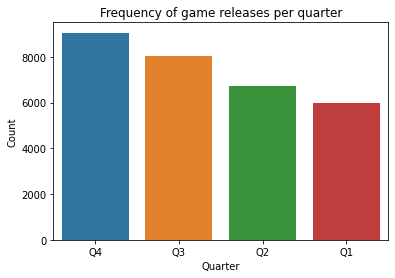

In [47]:
# Create quarter feature
data['release_quarter'] = data['release_month'].apply(quarter)

# Plot countplot using Seaborn
sns.countplot(x = data['release_quarter'], data = data, 
              order = data['release_quarter'].value_counts().index)
plt.title('Frequency of game releases per quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

**Recommendation:**

Q4 and in particular the month of October sees the most new games released. We would recommend ensuring advertisement deals are priced at a premium during this period.

Finally, let's look at release date for the user-item data.

In [48]:
# Create copy to work with
releasedatedata = mergeddata.copy()

# Select entries where release date is not null
releasedatedata = releasedatedata[releasedatedata['release_date'].notnull()]

# Replace strings which are not of the format xxxx-xx-xx with None
releasedatedata['release_date'] = releasedatedata['release_date'].map(lambda x : x if x[-3] == '-'else None)

# Select entries where release date is not null
releasedatedata = releasedatedata[releasedatedata['release_date'].notnull()]

# Convert to DateTime 
releasedatedata['release_date'] = pd.to_datetime(releasedatedata['release_date'])

# Check 
releasedatedata['release_date'].describe()

count                   72654
unique                   2114
top       2012-08-21 00:00:00
freq                      717
first     1983-06-19 00:00:00
last      2017-12-29 00:00:00
Name: release_date, dtype: object

Of course, we now have plenty of duplicate entries. However we note that the games span 1983 to 2018.

### Game library size

In [49]:
# View head
numgames.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


In [50]:
# Get summary statistics
numgames['items_count'].describe()

count    1000.000000
mean       89.280000
std       118.857927
min         0.000000
25%        22.000000
50%        57.000000
75%       113.000000
max      1280.000000
Name: items_count, dtype: float64

We have data for 88310 unique steam users. We note that the minimum number of games owned is 0 whereas the maximum is 7762. The average number of games owned is 58.

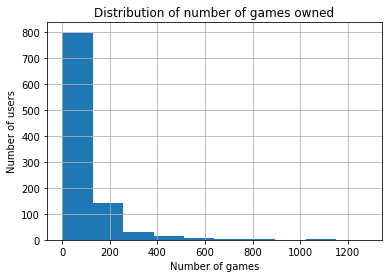

In [51]:
# Plot distribution of `items_count`
numgames['items_count'].hist()
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.show()

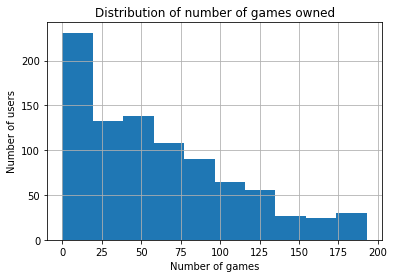

In [52]:
# Plot distribution of items_count within 90% centile
numgames[numgames['items_count'] < numgames['items_count'].quantile(0.90)].hist()
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.show()

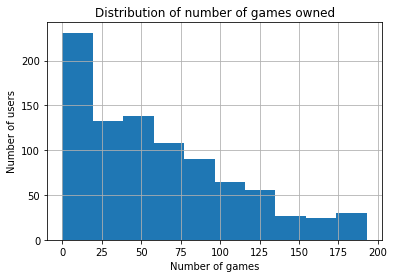

In [53]:
# Plot distribution of items_count within 90% centile
numgames[numgames['items_count'] < numgames['items_count'].quantile(0.90)].hist()
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.savefig('Images/numgames.pdf', bbox_inches = "tight")
plt.show()

**Recommendation:**

Focus campaign on users who have below the average number of games of 58. These users are more likely to find games they do not own which appeal.

### Game Price

In [54]:
# Create a copy to work with
gamesprice = gamesdata.copy()

# Get statistics and type
gamesprice['price'].describe()

count     30757
unique      162
top        4.99
freq       4278
Name: price, dtype: object

We see that the values are of type `object`. 

From viewing the head above, we noticed the presence of the string `Free To Play`. Let us replace that value with 0. 

We will also iterate and replace all strings we find with 0.

In [57]:
gamesprice = gamesprice.replace(to_replace = 'Free To Play', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free to Play', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free Demo', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play for Free!', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Install Now', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play WARMACHINE: Tactics Demo', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free Mod', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Install Theme', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Third-party', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play Now', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free HITMAN™ Holiday Pack', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Play the Demo', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Starting at $499.00', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Starting at $449.00', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free to Try', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free Movie', value = 0)
gamesprice = gamesprice.replace(to_replace = 'Free to Use', value = 0)
gamesprice[['app_name','price']].head(5)

,app_name,price
0,Lost Summoner Kitty,4.99
1,Ironbound,0
2,弹炸人2222,0.99
3,Log Challenge,2.99
4,Battle Royale Trainer,3.99


In [58]:
# Convert to float
gamesprice['price'] = gamesprice['price'].astype(float)

In [59]:
# Get summary statistics
gamesprice['price'].describe()

count    30757.000000
mean         8.867143
std         15.903635
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

We see that 75% of games are under $10! Looks like the majority of games are cheap.

In [60]:
belowcentile = gamesprice[gamesprice['price'] < gamesprice['price'].quantile(0.99)]

In [61]:
belowcentile['price'].describe()

count    30439.000000
mean         7.880138
std          8.100168
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max         49.990000
Name: price, dtype: float64

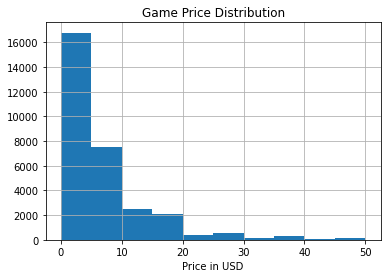

In [62]:
belowcentile['price'].hist()
plt.xlabel('Price in USD')
plt.title('Game Price Distribution')
plt.savefig('Images/price.pdf', bbox_inches = "tight")
plt.show()

**Recommendation**: Focus on volume of sales as the 75% of games are below $10. Highlights the importance of bundles for higher single transactions and where the user may not be interested in all games but still think it worthwhile.

### Game genre

In [63]:
gamesdata.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域,NaN,NaN
3,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN,NaN,NaN
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",NaN,http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd,Mixed,NaN


In [64]:
# Create copy
gamegenres = gamesdata.copy()

# Drop NaN
gamegenres = gamegenres[gamegenres['genres'].notnull()]

# Get unique lists
genres = list(gamegenres['genres'].unique())

# View first 5
genres[:5]

["['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']",
 "['Free to Play', 'Indie', 'RPG', 'Strategy']",
 "['Action', 'Adventure', 'Casual']",
 "['Action', 'Adventure', 'Simulation']",
 "['Free to Play', 'Indie', 'Simulation', 'Sports']"]

In [65]:
# Combine all strings
allgenres = ','.join(genres)

# Preview first 100 characters
allgenres[:100]

"['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],['Free to Play', 'Indie', 'RPG', 'Strategy']"

In [66]:
# Replace chars
allgenres = allgenres.replace("[","").replace("]", "").replace("'", "").replace(" ","")

# Check
allgenres[:100]

'Action,Casual,Indie,Simulation,Strategy,FreetoPlay,Indie,RPG,Strategy,Action,Adventure,Casual,Action'

In [67]:
# Split
splitgenres = allgenres.split(',')
splitgenres[:5]

['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']

In [68]:
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Accounting',
 'Action',
 'Adventure',
 'Animation&amp;Modeling',
 'AudioProduction',
 'Casual',
 'Design&amp;Illustration',
 'EarlyAccess',
 'Education',
 'FreetoPlay',
 'Indie',
 'MassivelyMultiplayer',
 'PhotoEditing',
 'RPG',
 'Racing',
 'Simulation',
 'SoftwareTraining',
 'Sports',
 'Strategy',
 'Utilities',
 'VideoProduction',
 'WebPublishing'}

In [69]:
# Create columns with genres
for genre in uniquegenres:
    gamegenres[genre] = 0
    
# Split genres in genres column
gamegenres['genres'] = gamegenres['genres'].map(lambda x : x.replace("["," ").replace("]", "").replace("'", "").replace(" ","").split(','))

# Map to columns - set to 1 if genre applies
for index, genres in enumerate(gamegenres['genres']):
    for genre in genres:
        gamegenres.loc[index,genre] = 1
        
# Visuale the new columns
gamegenres.head(2)  

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,...,SoftwareTraining,WebPublishing,Strategy,Action,Sports,RPG,AudioProduction,Accounting,MassivelyMultiplayer,Adventure
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Making Fun, Inc.","[FreetoPlay, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
gamegenres.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore',
       'PhotoEditing', 'Animation&amp;Modeling', 'Racing', 'VideoProduction',
       'Indie', 'Utilities', 'FreetoPlay', 'Design&amp;Illustration',
       'Education', 'Simulation', 'Casual', 'EarlyAccess', 'SoftwareTraining',
       'WebPublishing', 'Strategy', 'Action', 'Sports', 'RPG',
       'AudioProduction', 'Accounting', 'MassivelyMultiplayer', 'Adventure'],
      dtype='object')

In [71]:
# Start with empty dictionary
genredict = {}

# Get genre columns
genrecols = gamegenres.loc[:, 'Casual':'Adventure'].columns

# Go through each column and sum it
for col in genrecols:
    genredict[col] = gamegenres[col].sum()
        
# sort dictionary based on counts, ascending order so reverse = True    
sortedgenresdict = {keys: values for keys, values in \
                        sorted(genredict.items(), key = lambda item: item[1], reverse = True)}

In [72]:
# View dictionary
sortedgenresdict

{'Action': 11321.0,
 'Casual': 8281.0,
 'Adventure': 8243.0,
 'Strategy': 6957.0,
 'RPG': 5479.0,
 'EarlyAccess': 1462.0,
 'Sports': 1256.0,
 'MassivelyMultiplayer': 1108.0,
 'WebPublishing': 268.0,
 'SoftwareTraining': 105.0,
 'AudioProduction': 93.0,
 'Accounting': 7.0}

We see that Indie is the most popular genre, followed by Action. On the other end of the spectrum, there are few entries relating to Photo Editing and only 7 for Accounting. This makes sense as Steam is a gaming platform, and so photo editing or accounting software doesn't really belong.

### Game tags

In [73]:
# Create copy
gametags = gamesdata.copy()

# Drop NaN
gametags = gamegenres[gamegenres['tags'].notnull()]

# Get unique lists
tags = list(gametags['tags'].unique())

# View first 5
tags[:5]

["['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']",
 "['Free to Play', 'Strategy', 'Indie', 'RPG', 'Card Game', 'Trading Card Game', 'Turn-Based', 'Fantasy', 'Tactical', 'Dark Fantasy', 'Board Game', 'PvP', '2D', 'Competitive', 'Replay Value', 'Character Customization', 'Female Protagonist', 'Difficult', 'Design & Illustration']",
 "['Action', 'Adventure', 'Casual']",
 "['Action', 'Adventure', 'Simulation', 'FPS', 'Shooter', 'Third-Person Shooter', 'Sniper', 'Third Person']",
 "['Free to Play', 'Indie', 'Simulation', 'Sports']"]

In [74]:
# Combine all strings
alltags = ','.join(tags)

# Preview first 100 characters
alltags[:100]

"['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],['Free to Play', 'Strategy', 'Indie', 'RPG',"

In [75]:
# Replace chars
alltags = alltags.replace("["," ").replace("]", "").replace("'", "")

# Check
alltags[:100]

' Strategy, Action, Indie, Casual, Simulation, Free to Play, Strategy, Indie, RPG, Card Game, Trading'

In [76]:
# Split
splittags = alltags[1:].split(',')
splittags[:5]

['Strategy', ' Action', ' Indie', ' Casual', ' Simulation']

In [77]:
# Use set to obtain unique values
uniquetags = set(splittags)
len(uniquetags)

337

### Top publishers

In [78]:
# Select entries where publisher is non-null
data = gamesdata[gamesdata['publisher'].notnull()]

In [79]:
# Create dictionary
game_publishers = {}
for publisher in list(data['publisher']):
    if not publisher in game_publishers:
        game_publishers[publisher] = 1
    else:
        game_publishers[publisher] += 1

In [80]:
# Get top 10 publishers
top10_publishers = dict(Counter(game_publishers).most_common(10))
top10_publishers

{'Ubisoft': 385,
 'Dovetail Games - Trains': 360,
 'Degica': 286,
 'Paradox Interactive': 271,
 'SEGA': 251,
 'Dovetail Games - Flight': 220,
 'KOEI TECMO GAMES CO., LTD.': 208,
 'Activision': 202,
 'Big Fish Games': 195,
 'KISS ltd': 189}

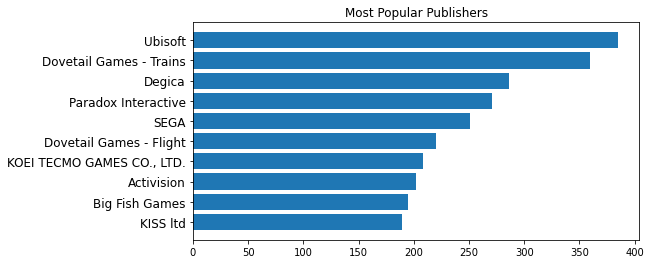

In [81]:
# Prepare for bar chart plot
top10_publishers = dict(sorted(Counter(game_publishers).most_common(10), key=lambda x:x[1]))

# Plots most popular publishers
fig = plt.figure(figsize = (8,4))
plt.barh(range(len(top10_publishers)), list(top10_publishers.values()), align='center')
plt.yticks(range(len(top10_publishers)), list(top10_publishers.keys()), fontsize=12)
plt.title("Most Popular Publishers", fontsize=12, fontweight= 22)
plt.show()